In [1]:
import numpy as np
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

import time
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

from sklearn.metrics import *

import matplotlib
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

import uproot as up 

import sys

import matplotlib.pyplot as plt

import numpy as np 

import awkward as ak


from mpl_toolkits import mplot3d
from tensorflow.keras import layers

import math as m

import tensorflow as tf


import pandas as pd

#import tensorflow as tf 


2023-03-14 09:53:03.389367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
class DataExtractor():
    def __init__(self,CSVNumber, Alt,n):
        #self.rootfile = rootfile
        self.CSVNumber = CSVNumber 
        self.Alt = Alt
        self.n = n 
    def Get(self):
        Cr = pd.read_csv('/Users/jacoblindahl/Cell{}.csv'.format(self.CSVNumber))
        
        Craw = Cr.fillna(0)
        
        Mraw = pd.read_csv('/Users/jacoblindahl/Module{}.csv'.format(self.CSVNumber))
        
        Lraw = pd.read_csv('/Users/jacoblindahl/Layer{}.csv'.format(self.CSVNumber))
        
        Eraw = pd.read_csv('/Users/jacoblindahl/Energy{}.csv'.format(self.CSVNumber)) 
        
        NR = len(Craw.axes[0])
        
        NC = len(Craw.axes[1])
        
        C = []
        
        M = []
        
        L = []
        
        E = []
        
        for i in range(NR):
            Ce = []
            
            Me = []
            
            Le = []
            
            Ee = []
            
            for j in range(NC):
                D = Craw['{}'.format(j)][i]
                #print(D)
                #print()
                if D != 0:
                    Ce.append(int(Craw['{}'.format(j)][i]))
                    Me.append(int(Mraw['{}'.format(j)][i]))
                    Le.append(int(Lraw['{}'.format(j)][i]))
                    Ee.append(int(Eraw['{}'.format(j)][i]))
        
            C.append(Ce)
            M.append(Me)
            L.append(Le)
            E.append(Ee)
        return C,M,L,E,NR
    
    def Merger(self):
        CN,MN,LN,EN,NN = DataExtractor(self.CSVNumber,False,1).Get()
        Merged  = []
        if self.Alt == True:
            NN = self.n
        for i in range(NN):
            MM = []
            for j in range(len(CN[i])):
                MM.append(int((MN[i][j])*1000000+CN[i][j]*1000 + EN[i][j]))
            Merged.append(MM)
        Merged = np.array(Merged,dtype = 'object')   
        return Merged 
        

In [49]:
class DataMerger():
    def __init__(self,CSVNumbers, NumberClasses, Alternative, N):
        self.CSVNumbers = CSVNumbers
        self.NumberClasses = NumberClasses
        self.Alternative = Alternative 
        self.N = N
    def ClassMerger(self):
        MC = []
        YC = []
        j = 0
        for i in range(len(self.CSVNumbers)):
            DataM = DataExtractor(self.CSVNumbers[i],self.Alternative,self.N).Merger()
            NL = len(DataM)
            MC.append(DataM)
            YC.append([j for k in range(NL)])
            j = j+1
        Xdata = np.concatenate(tuple(MC), axis=0)
        DY = np.concatenate(tuple(YC), axis=0)
        Ydata = to_categorical(DY,num_classes = self.NumberClasses, dtype='int32')
        
        return Xdata,Ydata

In [50]:
X,Y = DataMerger([1,2],2,False,1).ClassMerger()

/var/folders/wc/c10qf9lx68b8z4gwjr_xxmp00000gn/T/ipykernel_2346/410145529.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Merged = np.array(Merged)
/var/folders/wc/c10qf9lx68b8z4gwjr_xxmp00000gn/T/ipykernel_2346/410145529.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Merged = np.array(Merged)


In [51]:
print(X.shape)
print(Y.shape)

(40000,)
(40000, 2)


In [58]:
XT,YT = DataMerger(['1t','2t'],2,False,1).ClassMerger()




/var/folders/wc/c10qf9lx68b8z4gwjr_xxmp00000gn/T/ipykernel_2346/410145529.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Merged = np.array(Merged)
/var/folders/wc/c10qf9lx68b8z4gwjr_xxmp00000gn/T/ipykernel_2346/410145529.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Merged = np.array(Merged)


In [59]:
print(XT.shape)
print(YT.shape)

(10000,)
(10000, 2)


In [61]:


padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    X, padding="post",dtype='int32'
)

padded_inputsT = tf.keras.preprocessing.sequence.pad_sequences(
    XT, padding="post", maxlen = 229,dtype='int32'
)


print(padded_inputs.shape)
print(padded_inputsT.shape)
Xtrain = padded_inputs.reshape(len(X),229,1)
Xtest = padded_inputsT.reshape(len(XT),229,1)
print(Xtrain.shape)
print(Xtest.shape)
#print(Xtrain)





(40000, 229)
(10000, 229)
(40000, 229, 1)
(10000, 229, 1)


In [65]:
from tensorflow.keras import layers

masking_layer = layers.Masking()


unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]), tf.float32
)

masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)



inp = Input(shape=(229, 1))


masking = keras.layers.Masking(mask_value=0)(inp)

lstm_1 = keras.layers.GRU(250, activation='tanh',return_sequences=True)(masking)


lstm_2 = keras.layers.GRU(150, activation='tanh',return_sequences=True)(lstm_1)


lstm_3 = keras.layers.GRU(150, activation='tanh')(lstm_2)




Dense1 = keras.layers.Dense(150,'relu')(lstm_3)


Dense2 = keras.layers.Dense(50,'relu')(Dense1)






#Dense3 = keras.layers.Dense(10,'relu')(Dense2)

#Flatten()

#Dense2 = keras.layers.Dense(100,'relu')(Dense1)

#Dense3 = keras.layers.Dense(50,'tanh')(Dense2)

#Flat  = keras.layers.Flatten()(Dense1)





Dense = keras.layers.Dense(2,'softmax')(Dense2)


model = keras.models.Model(inputs=inp, outputs=Dense)


adam = Adam(learning_rate= 0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics = ['accuracy'])


#model = Sequential()

#model.add(layers.Masking(mask_value=0.0))

#model.add(GRU(units=250,input_shape=(217, 1),activation='tanh',return_sequences=True))

#model.add(GRU(units=150,input_shape=(217, 1),activation='tanh',return_sequences=True))

#model.add(GRU(units=150,input_shape=(217, 1),activation='tanh'))

#model.add(Dense(150,activation  = 'relu'))

#model.add(Dense(50,activation  = 'relu'))

#model.add(Dense(2, activation = 'softmax'))
#model.summary()



#model.compile(loss='categorical_crossentropy',
#              optimizer=adam,
#              metrics=['accuracy'])


#model.summary()

tf.Tensor(
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]], shape=(40000, 229), dtype=bool)


In [66]:
RNNM = model.fit(Xtrain,Y, epochs = 5, batch_size = 50,validation_data=(Xtest,YT))
model.summary()

Epoch 1/5
800/800 [==============================] - 856s 1s/step - loss: 0.1097 - accuracy: 0.9353 - val_loss: 0.0088 - val_accuracy: 0.9972
Epoch 2/5
800/800 [==============================] - 996s 1s/step - loss: 0.0156 - accuracy: 0.9940 - val_loss: 0.0049 - val_accuracy: 0.9985
Epoch 3/5
800/800 [==============================] - 864s 1s/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 4/5
800/800 [==============================] - 862s 1s/step - loss: 0.0208 - accuracy: 0.9926 - val_loss: 0.0044 - val_accuracy: 0.9978
Epoch 5/5
800/800 [==============================] - 935s 1s/step - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0045 - val_accuracy: 0.9978
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 229, 1)]          0         
                                                                 
 masking_

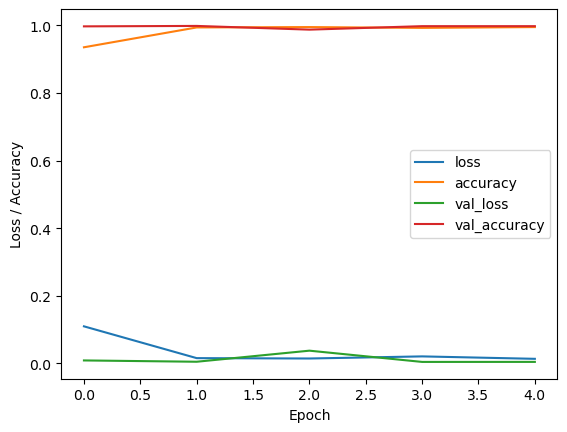

In [67]:
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in RNNM.history.keys():
    plt.plot(RNNM.history[k], label = k) 
plt.legend(loc='best')
plt.show()

In [22]:
#sklearn for confusion_matrix look up 
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(Xtest)
y_prediction = np.argmax (y_prediction, axis = 1)

y_test=np.argmax(Ytest, axis=1)

result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

#Create confusion matrix and normalizes it over predicted (columns)
#result = confusion_matrix(Ytest, y_prediction , normalize='pred')



63/63 [==============================] - 10s 165ms/step
[[0.998998   0.00299401]
 [0.001002   0.99700599]]


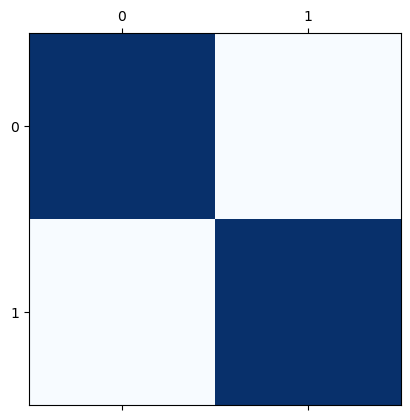

In [25]:
#plt.matshow(result,cmap = 'Blues')

In [68]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def multi_stat_3(model = None, x_test = None, y_test = None, lbl = None):
    y_pred = model.predict(x_test, verbose=0 )
    print(lbl,' log_loss:  ', log_loss(y_test, y_pred, eps=1e-15))

    y_true = y_test.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    print(lbl, ' accuracy:  ',(y_pred==y_true).mean(), '\n')

    target_names = ['class {}'.format(i+1) for i in range(3)]

    confuTst = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = target_names,
                          title        = "Confusion Matrix: " + lbl)

Training  log_loss:   0.005138257660658919
Training  accuracy:   0.99825 



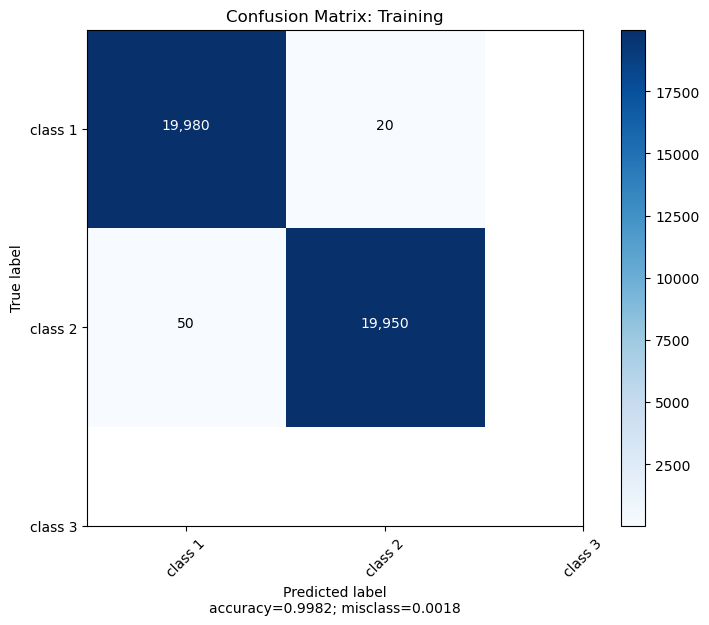

Validation  log_loss:   0.0044830883320400115
Validation  accuracy:   0.9978 



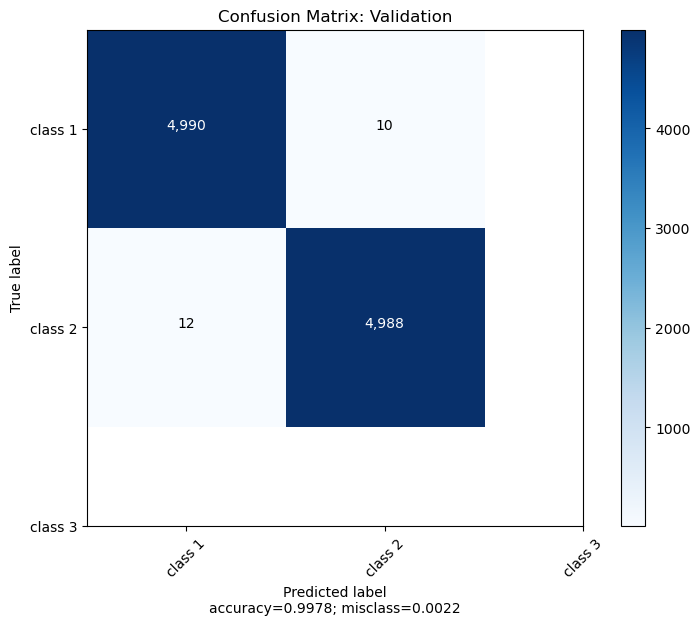

In [70]:
multi_stat_3(model, Xtrain,Y, 'Training')
    
multi_stat_3(model, Xtest,YT, 'Validation')